<a href="https://colab.research.google.com/github/dhanalakshmi-krishnamurthy/Projects/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
data=pd.read_csv('/content/drive/MyDrive/Project 2/creditcard.csv')
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
0,1.0,0.766127,45.0,Male,South,9120.0,Ownhouse,Self_Emp,Matric,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2,Bad
1,0.0,0.957151,40.0,Female,South,2600.0,Ownhouse,Self_Emp,Graduate,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1,Good
2,0.0,0.658180,38.0,Female,South,3042.0,Ownhouse,Self_Emp,PhD,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0,Good
3,0.0,0.233810,30.0,Female,South,3300.0,Ownhouse,Self_Emp,Professional,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0,Good
4,0.0,0.907239,49.0,Male,South,63588.0,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0,Good


In [5]:
data.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'Gender',
       'Region', 'MonthlyIncome', 'Rented_OwnHouse', 'Occupation', 'Education',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome.1',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'Good_Bad'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150002 entries, 0 to 150001
Data columns (total 18 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   NPA Status                            150000 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  float64
 3   Gender                                150000 non-null  object 
 4   Region                                150000 non-null  object 
 5   MonthlyIncome                         120269 non-null  float64
 6   Rented_OwnHouse                       150000 non-null  object 
 7   Occupation                            150000 non-null  object 
 8   Education                             150000 non-null  object 
 9   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  float64
 10  DebtRatio                             150000 non-null  float64
 11  

In [7]:
data.isnull().sum()

NPA Status                                  2
RevolvingUtilizationOfUnsecuredLines        2
age                                         2
Gender                                      2
Region                                      2
MonthlyIncome                           29733
Rented_OwnHouse                             2
Occupation                                  2
Education                                   2
NumberOfTime30-59DaysPastDueNotWorse        2
DebtRatio                                   2
MonthlyIncome.1                         29733
NumberOfOpenCreditLinesAndLoans             2
NumberOfTimes90DaysLate                     2
NumberRealEstateLoansOrLines                2
NumberOfTime60-89DaysPastDueNotWorse        2
NumberOfDependents                       3924
Good_Bad                                    2
dtype: int64

In [8]:
data.tail()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
149997,0.0,0.246044,58.0,Male,North,NaN,Rented,Officer2,Professional,0.0,3870.000000,NaN,18.0,0.0,1.0,0.0,0,Good
149998,0.0,0.000000,30.0,Male,North,5716.0,Rented,Non-officer,Professional,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0,Good
149999,0.0,0.850283,64.0,Male,North,8158.0,Ownhouse,Self_Emp,Professional,0.0,0.249908,8158.0,8.0,0.0,2.0,0.0,0,Good
150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good,NaN
150001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad,NaN


In [9]:
data.drop(data.tail(2).index,inplace = True)

In [10]:
data.isnull().sum()

NPA Status                                  0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
Gender                                      0
Region                                      0
MonthlyIncome                           29731
Rented_OwnHouse                             0
Occupation                                  0
Education                                   0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome.1                         29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
Good_Bad                                    0
dtype: int64

In [11]:
data.tail()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
149995,0.0,0.040674,74.0,Male,North,2100.0,Ownhouse,Non-officer,Professional,0.0,0.225131,2100.0,4.0,0.0,1.0,0.0,0,Good
149996,0.0,0.299745,44.0,Male,North,5584.0,Ownhouse,Self_Emp,Professional,0.0,0.716562,5584.0,4.0,0.0,1.0,0.0,2,Good
149997,0.0,0.246044,58.0,Male,North,NaN,Rented,Officer2,Professional,0.0,3870.000000,NaN,18.0,0.0,1.0,0.0,0,Good
149998,0.0,0.000000,30.0,Male,North,5716.0,Rented,Non-officer,Professional,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0,Good
149999,0.0,0.850283,64.0,Male,North,8158.0,Ownhouse,Self_Emp,Professional,0.0,0.249908,8158.0,8.0,0.0,2.0,0.0,0,Good


In [12]:
data.describe()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,MonthlyIncome,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse
count,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,6.048438,52.295207,6.670221e+03,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387
std,0.249746,249.755371,14.771866,1.438467e+04,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,3.400000e+03,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,5.400000e+03,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000
75%,0.000000,0.559046,63.000000,8.249000e+03,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000
max,1.000000,50708.000000,109.000000,3.008750e+06,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000


In [13]:
data['MonthlyIncome']=data['MonthlyIncome'].fillna(data['MonthlyIncome'].mean())

In [14]:
data['MonthlyIncome.1']=data['MonthlyIncome.1'].fillna(data['MonthlyIncome.1'].mean())

In [15]:
data['NumberOfDependents']=data['NumberOfDependents'].astype(float)

In [16]:
data['NumberOfDependents']=data['NumberOfDependents'].fillna(data['NumberOfDependents'].mean())

In [17]:
data.isnull().sum()

NPA Status                              0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
Gender                                  0
Region                                  0
MonthlyIncome                           0
Rented_OwnHouse                         0
Occupation                              0
Education                               0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome.1                         0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
Good_Bad                                0
dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
lb=LabelEncoder()

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 18 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   NPA Status                            150000 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  float64
 3   Gender                                150000 non-null  object 
 4   Region                                150000 non-null  object 
 5   MonthlyIncome                         150000 non-null  float64
 6   Rented_OwnHouse                       150000 non-null  object 
 7   Occupation                            150000 non-null  object 
 8   Education                             150000 non-null  object 
 9   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  float64
 10  DebtRatio                             150000 non-null  float64
 11  

In [22]:
data['Gender']=lb.fit_transform(data['Gender'])
data['Region']=lb.fit_transform(data['Region'])
data['Rented_OwnHouse']=lb.fit_transform(data['Rented_OwnHouse'])
data['Occupation']=lb.fit_transform(data['Occupation'])
data['Education']=lb.fit_transform(data['Education'])
data['Good_Bad']=lb.fit_transform(data['Good_Bad'])

In [23]:
data.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
0,1.0,0.766127,45.0,1,3,9120.0,0,4,1,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0,0
1,0.0,0.957151,40.0,0,3,2600.0,0,4,0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0,1
2,0.0,0.658180,38.0,0,3,3042.0,0,4,2,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0,1
3,0.0,0.233810,30.0,0,3,3300.0,0,4,4,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0,1
4,0.0,0.907239,49.0,1,3,63588.0,0,4,3,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0,1


In [24]:
x=data.drop(['Good_Bad'],axis=1)
x.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1.0,0.766127,45.0,1,3,9120.0,0,4,1,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0.0,0.957151,40.0,0,3,2600.0,0,4,0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0.0,0.658180,38.0,0,3,3042.0,0,4,2,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0.0,0.233810,30.0,0,3,3300.0,0,4,4,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0.0,0.907239,49.0,1,3,63588.0,0,4,3,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [25]:
y=data['Good_Bad']
y.head()

0    0
1    1
2    1
3    1
4    1
Name: Good_Bad, dtype: int64

In [26]:
data['Good_Bad'].value_counts()

1    139974
0     10026
Name: Good_Bad, dtype: int64

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.3,random_state=42)

In [28]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum( y_train == 0))) 
  

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)   #y_train.ravel() 
  
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 


Before OverSampling, counts of label '1': 97982
Before OverSampling, counts of label '0': 7018 



/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (195964, 17)
After OverSampling, the shape of train_y: (195964,) 

After OverSampling, counts of label '1': 97982
After OverSampling, counts of label '0': 97982


In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
k=np.arange(2,30)
train_accuracy=np.empty(len(k))
test_accuracy=np.empty(len(k))
for i,k in enumerate(k):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy[i]=knn.score(x_train,y_train)
    test_accuracy[i]=knn.score(x_test,y_test)
    print(train_accuracy[i])
    print(test_accuracy[i])

0.9625619047619047
0.8715555555555555
0.9453333333333334
0.9282444444444444
0.9445714285714286
0.9229555555555555
0.9375714285714286
0.9322888888888888
0.9381333333333334
0.9309111111111111
0.9350952380952381
0.9334666666666667
0.9354571428571429
0.933
0.9344380952380953
0.9336666666666666
0.9347047619047619
0.9337111111111112
0.9339714285714286
0.9337333333333333
0.9341047619047619
0.9338888888888889
0.9338095238095238
0.9336222222222222
0.933847619047619
0.9336222222222222
0.9336190476190476
0.9336222222222222
0.9336571428571429
0.9335777777777777
0.9335238095238095
0.9334222222222223
0.9335809523809524
0.9335111111111111
0.9335523809523809
0.9334888888888889
0.9335523809523809
0.9334222222222223
0.9335333333333333
0.9335333333333333
0.933495238095238
0.9335333333333333
0.9334285714285714
0.9335111111111111
0.9334571428571429
0.9334666666666667
0.9334666666666667
0.9334888888888889
0.9334380952380953
0.9335555555555556
0.9334380952380953
0.9335111111111111
0.9334190476190476
0.933444

In [31]:
k=np.arange(2,30)
k

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

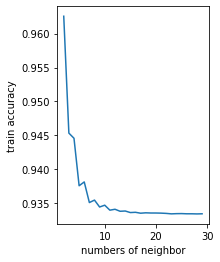

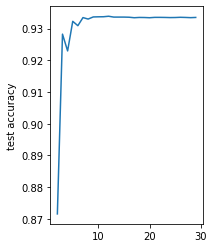

In [32]:
plt.subplot(1,2,1)
plt.plot(k,train_accuracy)
plt.xlabel('numbers of neighbor')
plt.ylabel('train accuracy')
plt.show()
plt.subplot(1,2,2)
plt.plot(k,test_accuracy)
plt.ylabel('test accuracy')
plt.show()

In [33]:
idx=np.where(test_accuracy==max(test_accuracy))
s=k[idx]
s

array([12])

In [34]:
model=KNeighborsClassifier(n_neighbors=12)

In [35]:
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [36]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [37]:
y_test

23034     1
29866     1
4414      1
127579    1
91060     1
         ..
12810     1
40956     1
48541     1
123904    1
138209    1
Name: Good_Bad, Length: 45000, dtype: int64

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
confusion_matrix(y_test,y_pred)

array([[   53,  2955],
       [   20, 41972]])

In [40]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Good_Bad,,
0,53,2955
1,20,41972


In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test,y_pred)

0.9338888888888889

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
scores=cross_val_score(model,x,y,cv=10)
scores

array([0.93333333, 0.93393333, 0.93373333, 0.9334    , 0.93306667,
       0.93326667, 0.93346667, 0.93353333, 0.93366667, 0.933     ])

In [45]:
scores.mean()

0.93344

In [46]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.02      0.03      3008
           1       0.93      1.00      0.97     41992

    accuracy                           0.93     45000
   macro avg       0.83      0.51      0.50     45000
weighted avg       0.92      0.93      0.90     45000



In [48]:
#Using Grid Search CV

In [49]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [50]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'n_neighbors': [2,4,6,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25],'weights':['uniform','distance'],
          'metric':['euclidean','manhattan']}

gcv = GridSearchCV(estimator=model,param_grid=params,verbose=1,cv=3,n_jobs=-1)
gcv.fit(x_train,y_train)


Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 30.0min


In [54]:
gcv.best_params_

{'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}